In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.options.display.max_rows = 450

In [2]:
mData = pd.read_csv("metricsF.csv", header=None, index_col=None)

In [3]:
F = mData.iloc[[1,2,4,11],:]
noF = mData.iloc[[0,3,5,6,7,8,9,10,12,13,14,15,16,17],:]
F

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
1,1,14314.000000,79.067970,4158.800000,52.333333,71.100481,138.666667,9915.866667,80.821811,0.151325,...,25.333333,5.441444,3.235418,1.898974,-7.297585,-0.112864,113.333333,67.907632,4.733333,3.235418
2,1,19564.925000,112.654855,6184.775000,55.111111,101.298073,133.500000,13490.725000,117.789179,0.431161,...,27.777778,12.605049,2.130657,-2.917176,-14.380514,-0.332876,104.333333,94.134850,0.955556,2.130657
4,1,13593.333330,93.054986,3283.716667,35.615385,86.371398,118.769231,10242.450000,95.804210,0.096287,...,30.214286,9.009999,7.537670,5.679777,-2.457684,-0.076627,87.923077,82.398690,5.166667,7.537670
11,1,9886.533333,75.552289,3442.800000,45.600000,71.513324,88.250000,6372.400000,77.374681,0.246374,...,19.666667,5.051641,0.571637,-1.517770,-4.894211,-0.237614,69.333333,68.957367,-0.200000,0.571637


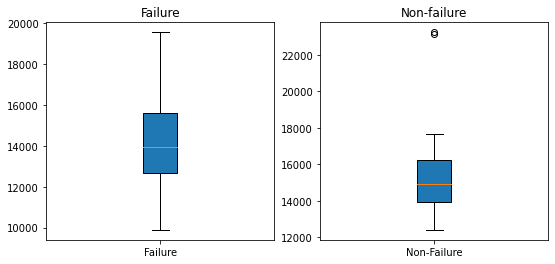

In [48]:
F = mData.iloc[[1,2,4,11],:]
noF = mData.iloc[[0,3,5,6,7,8,9,10,12,13,14,15,16,17],:]



labels = ['Failure']
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot1 = ax1.boxplot(F.iloc[:,1],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Failure')

labels = ['Non-Failure']
bplot2 = ax2.boxplot(noF.iloc[:,1],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Non-failure')



plt.show()

In [58]:
#Split train-test data manually due to lack of data (ensure 2 HF in train and test data)
y = mData.iloc[:,0]
X = mData.iloc[:,1:]

X_train = X.iloc[[0,1,4,5,7,9,13,15,17],:]
y_train = mData.iloc[[0,1,4,5,7,9,13,15,17],0]
X_test = X.iloc[[2,3,6,8,10,11,12,14,16],:]
y_test = mData.iloc[[2,3,6,8,10,11,12,14,16],0]

In [53]:
#Split train-test data manually due to lack of data (ensure 2 HF in train and test data) - method 2
y = mData.iloc[:,0]
X = mData.iloc[:,1:]

X_train = X.iloc[[1,2,3,5,6,7,8,14,15],:]
y_train = mData.iloc[[1,2,3,5,6,7,8,14,15],0]
X_test = X.iloc[[0,4,9,10,11,12,13,16,17],:]
y_test = mData.iloc[[0,4,9,10,11,12,13,16,17],0]

In [59]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


   True  Prediction
0     1           0
1     0           0
2     0           0
3     0           1
4     0           0
5     1           1
6     0           0
7     0           0
8     0           0
Accuracy: 0.7777777777777778
Precision: 0.5
Recall: 0.5


In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = pd.Series(classifier.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


   True  Prediction
0     1           0
1     0           0
2     0           0
3     0           1
4     0           0
5     1           0
6     0           0
7     0           0
8     0           0
Accuracy: 0.6666666666666666
Precision: 0.0
Recall: 0.0


In [56]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(X_train, y_train)

y_pred = pd.Series(classifier.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


   True  Prediction
0     0           0
1     1           0
2     0           0
3     0           0
4     1           0
5     0           0
6     0           0
7     0           0
8     0           0
Accuracy: 0.7777777777777778
Precision: 0.0
Recall: 0.0


/Users/amitvallabh/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = pd.Series(classifier.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


   True  Prediction
0     0           0
1     1           0
2     0           0
3     0           0
4     1           0
5     0           0
6     0           0
7     0           0
8     0           0
Accuracy: 0.7777777777777778
Precision: 0.0
Recall: 0.0


/Users/amitvallabh/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = pd.Series(classifier.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

   True  Prediction
0     1           0
1     0           0
2     0           0
3     0           0
4     0           0
5     1           0
6     0           0
7     0           0
8     0           0
Accuracy: 0.7777777777777778
Precision: 0.0
Recall: 0.0


/Users/amitvallabh/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
